# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [119]:
# bank-additional-full.csv contains 41,188 rows of data; 20 input features and 1 target column 'y'

# The dataset is associated with direct marketing campaigns (phone calls) of a Portuguese bank. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from time import time

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [11]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print columns with missing values, if any
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [12]:
# There are no missing values in any of the features

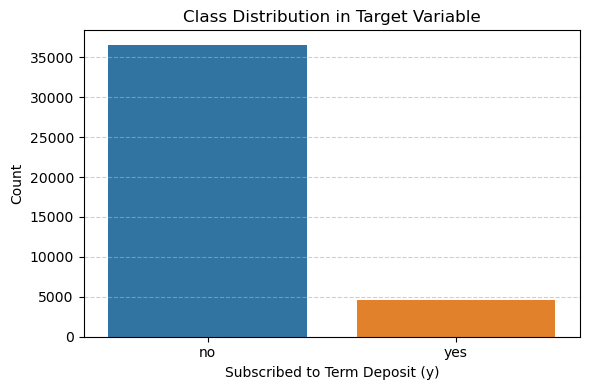

In [13]:
# Visualize the target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='y')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

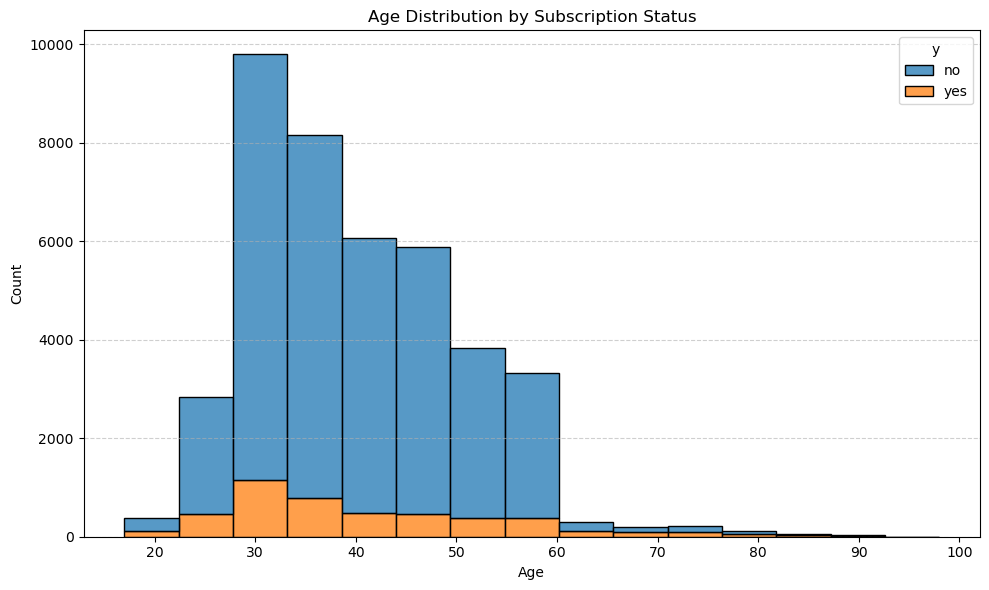

In [14]:
# Visualize relationship between age and subscription status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='y', bins=15, multiple='stack')
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [17]:
# The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)

# Build different classifier models and use the best model to meet the business objectives

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [19]:
# Encode target column
df['y'] = df['y'].map({'yes': 1, 'no': 0})
target = df['y']

In [20]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [21]:
# Encode categorical features using OneHotEncoder
# Use only bank client data features: age, job, marital, education, default, housing, loan and drop all other features

bank_df = pd.get_dummies(df.drop(columns=['y', 'contact', 'month', 'day_of_week', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']), drop_first=True)

In [22]:
bank_df.head()

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,37,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,40,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [24]:
# Split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(bank_df, target, test_size=0.3, random_state=42, stratify=target)

In [25]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [27]:
# Class distribution
print(target.value_counts())
print(target.value_counts(normalize=True))

y
0    36548
1     4640
Name: count, dtype: int64
y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [28]:
# Determine the baseline score by using the DummyClassifier

dummy_clf = DummyClassifier(strategy='stratified', random_state=42).fit(X_train, y_train)

y_pred_dummy = dummy_clf.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_dummy)
baseline_precision = precision_score(y_test, y_pred_dummy, pos_label=1) # pos_label = 1 since predicting for positive class 'y', which is numerically mapped to 1
baseline_recall = recall_score(y_test, y_pred_dummy, pos_label=1) # pos_label = 1 since predicting for positive class 'y', which is numerically mapped to 1
baseline_f1 = f1_score(y_test, y_pred_dummy, pos_label=1) # pos_label = 1 since predicting for positive class 'y', which is numerically mapped to 1

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Recall: {baseline_recall:.4f}")
print(f"Baseline F1-Score: {baseline_f1:.4f}")

Baseline Accuracy: 0.8027
Baseline Precision: 0.1182
Baseline Recall: 0.1164
Baseline F1-Score: 0.1173


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [30]:
# Build and train basic Logistic Regression model

log_reg = LogisticRegression(max_iter = 5000, class_weight='balanced') # class_weight = balanced since the dataset is imbalanced 
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [32]:
# Predictions on the test set
y_pred = log_reg.predict(X_test)

In [33]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

In [34]:
accuracy_score = log_reg.score(X_test, y_test)
print(f"Accuracy Score: {accuracy_score:.4f}")

# Recall score is a better metric for this imbalanced dataset
rec_score = recall_score(y_test, y_pred)
print(f"Recall Score: {rec_score:.4f}")

Accuracy Score: 0.5942
Recall Score: 0.6228


In [35]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[6475 4490]
 [ 525  867]]


In [36]:
# This simple Logistic Regression model did not perform well as evident from the low accuracy and recall score and also the confusion matrix with high proportion of false positives (4490) and false negatives (525)

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [38]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(class_weight='balanced')
}

In [39]:
# Train and evaluate different classifiers

results = []

for model_name, model in models.items():
    start_time = time()
    model.fit(X_train, y_train)
    train_time = time() - start_time
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    rec_score_train = recall_score(y_train, y_pred_train, pos_label=1)
    rec_score_test = recall_score(y_test, y_pred_test, pos_label=1)

    results.append({
        "Model": model_name,
        "Train Time": train_time,
        "Train Accuracy": rec_score_train,
        "Test Accuracy": rec_score_test,
    })

In [40]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index('Model')

print(results_df)

                     Train Time  Train Accuracy  Test Accuracy
Model                                                         
Logistic Regression    0.066860        0.625000       0.622845
KNN                    0.008749        0.132389       0.076149
Decision Tree          0.052187        0.304187       0.088362
SVM                   20.054107        0.656404       0.604885


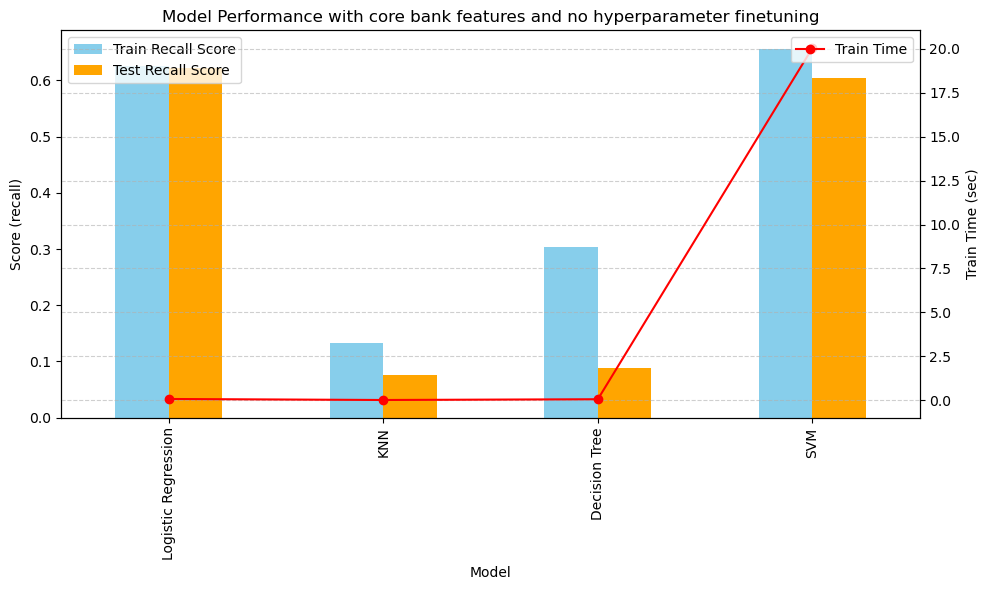

In [41]:
# Build a plot to visualize and compare model performances
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for train and test scores
results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=ax1, color=['skyblue', 'orange'])
ax1.set_ylabel('Score (recall)')
ax1.set_title('Model Performance with core bank features and no hyperparameter finetuning')

# Add a secondary y-axis for train time
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Train Time'], marker='o', color='red', label='Train Time')
ax2.set_ylabel('Train Time (sec)')

# Add legend and grid
ax1.legend(['Train Recall Score', 'Test Recall Score'], loc='upper left')
ax2.legend(['Train Time'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [42]:
# Model performance without any hyperparameter finetuning is not optimal and hence need to try to improve the accuracy with hyperparameter finetuning

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [44]:
# Try to improve the model with hyperparameter finetuning
# Define corresponding hyperparameters for various classifiers
models = {
    'Logistic Regression': (LogisticRegression(max_iter=1000, class_weight='balanced'), {'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Decision Tree': (DecisionTreeClassifier(class_weight='balanced'), {'max_depth': [5, 10, None]}),
    'SVM': (SVC(class_weight='balanced'), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})
}

In [45]:
# Perform GridSearchCV and evaluate models

results = []

for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=5, n_jobs=-1)
    
    start_time = time()
    grid_search.fit(X_train, y_train)
    train_time = time() - start_time
    
    # Get the best estimator and predict on the train and test set
    best_model = grid_search.best_estimator_
  
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    rec_score_train = recall_score(y_train, y_pred_train, pos_label=1)
    rec_score_test = recall_score(y_test, y_pred_test, pos_label=1)
        
    results.append({
        'Model': model_name,
        'Train Time': train_time,
        "Train Accuracy": rec_score_train,
        "Test Accuracy": rec_score_test,
        'Best Params': grid_search.best_params_
    })

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [46]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index('Model')

print(results_df)

                     Train Time  Train Accuracy  Test Accuracy  \
Model                                                            
Logistic Regression    1.430306        0.625000       0.622845   
KNN                    1.420546        0.217672       0.104167   
Decision Tree          0.291890        0.582820       0.516523   
SVM                  395.798677        0.569889       0.576868   

                                         Best Params  
Model                                                 
Logistic Regression                        {'C': 10}  
KNN                               {'n_neighbors': 3}  
Decision Tree                      {'max_depth': 10}  
SVM                  {'C': 0.1, 'kernel': 'sigmoid'}  


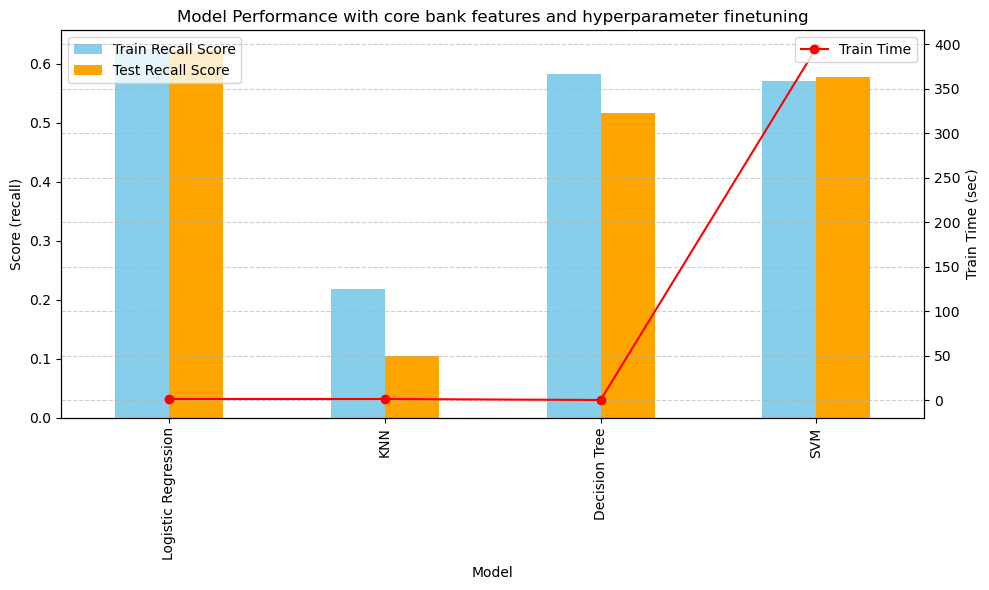

In [47]:
# Build a plot to visualize and compare model performances

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for train and test scores
results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=ax1, color=['skyblue', 'orange'])
ax1.set_ylabel('Score (recall)')
ax1.set_title('Model Performance with core bank features and hyperparameter finetuning')

# Add a secondary y-axis for train time
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Train Time'], marker='o', color='red', label='Train Time')
ax2.set_ylabel('Train Time (sec)')

# Add legend and grid
ax1.legend(['Train Recall Score', 'Test Recall Score'], loc='upper left')
ax2.legend(['Train Time'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [48]:
# Model performance with hyperparameter finetuning mostly improved the Decision Tree classifier accuracy score but still not optimal and also the other model performance did not improve
# Consider other bank dataset features to try and improve the model performance

In [49]:
# Try to improve the model by including more features and hyperparameter fine-tuning

# Encode categorical features using OneHotEncoder
bank_df_full = pd.get_dummies(df.drop(columns=['y']), drop_first=True)

In [50]:
bank_df_full.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,True,False,False,False,True,False


In [51]:
# Split data into train and test datasets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(bank_df_full, target, test_size=0.3, random_state=42, stratify=target)

In [52]:
# Scale numerical features
scaler = StandardScaler()
X_train_full = scaler.fit_transform(X_train_full)
X_test_full = scaler.transform(X_test_full)

In [53]:
# Perform GridSearchCV and evaluate models

results = []

for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=5, n_jobs=-1)
    
    start_time = time()
    grid_search.fit(X_train_full, y_train_full)
    train_time = time() - start_time
    
    # Get the best estimator and predict on the train and test set
    best_model = grid_search.best_estimator_
  
    y_pred_train = best_model.predict(X_train_full)
    y_pred_test = best_model.predict(X_test_full)

    rec_score_train = recall_score(y_train_full, y_pred_train, pos_label=1)
    rec_score_test = recall_score(y_test_full, y_pred_test, pos_label=1)
        
    results.append({
        'Model': model_name,
        'Train Time': train_time,
        "Train Accuracy": rec_score_train,
        "Test Accuracy": rec_score_test,
        'Best Params': grid_search.best_params_
    })

In [54]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).set_index('Model')

print(results_df)

                     Train Time  Train Accuracy  Test Accuracy  \
Model                                                            
Logistic Regression    0.649163        0.886700       0.900144   
KNN                    1.825646        0.552956       0.344828   
Decision Tree          0.448267        0.918719       0.910920   
SVM                  303.467525        0.911946       0.919540   

                                      Best Params  
Model                                              
Logistic Regression                     {'C': 10}  
KNN                            {'n_neighbors': 3}  
Decision Tree                    {'max_depth': 5}  
SVM                  {'C': 1, 'kernel': 'linear'}  


In [55]:
print(confusion_matrix(y_test_full, y_pred_test))

[[9191 1774]
 [ 112 1280]]


In [56]:
# The model performances improved significatnyl as evident from the high accuracy scores and also the low proportion of false positives and false negativesin the confusion matrix

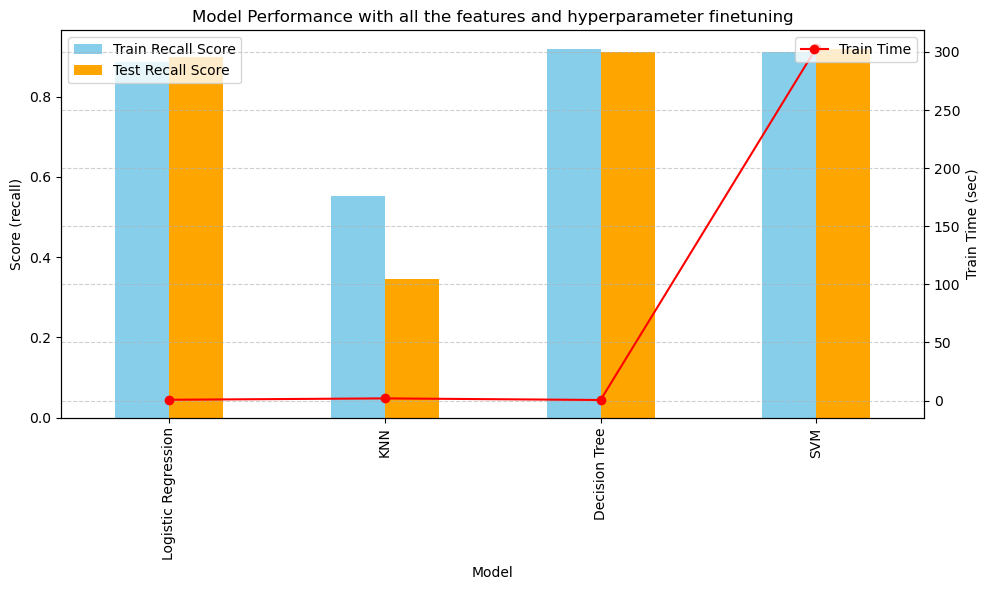

In [57]:
# Build a plot to visualize and compare model performances

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for train and test scores
results_df[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', ax=ax1, color=['skyblue', 'orange'])
ax1.set_ylabel('Score (recall)')
ax1.set_title('Model Performance with all the features and hyperparameter finetuning')

# Add a secondary y-axis for train time
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df['Train Time'], marker='o', color='red', label='Train Time')
ax2.set_ylabel('Train Time (sec)')

# Add legend and grid
ax1.legend(['Train Recall Score', 'Test Recall Score'], loc='upper left')
ax2.legend(['Train Time'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [125]:
# Conclusion:
# The model performance of all classifiers increased when the complete bank feature dataset is used along with hyperparameter finetuning.
# The test accuracy of SVM is highest. However, the train time (and the compute resources) are also highest.
# KNN’s Train and Test accuracy scores are lowest amongst all classifiers.
# Decision Trees train time and accuracy scores were slightly better when all the features were used along with hyperparameter fine tuning as compared to Logistic Regression.
# However, considering how logistic regression model consistently performed well with and without hyperparameter finetuning, it appears to be the most reliable classifier without the potential 
# of overfitting and one that can be generalized to perform well on unseen data. The training time of Logistic Regression is also comparable to Decision Tree and significantly lower than SVM. 
#
# Next steps & recommendations:
# Further feature engineering and hyperparameter finetuning techniques could be experimented to make the model perform even better. However, it is important to avoid overfitting and ensuring the training time & resources
# are optimally used.

##### Questions